<a href="https://colab.research.google.com/github/Irvingbit/Pixels/blob/main/CNN-GrupoPixels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cargando el archivo mnist_test.csv...

--- Comprensión de Datos ---
Dimensiones del DataFrame: (10000, 785)

Primeras 5 filas:
   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      7    0    0    0    0    0    0    0    0    0  ...      0      0   
1      2    0    0    0    0    0    0    0    0    0  ...      0      0   
2      1    0    0    0    0    0    0    0    0    0  ...      0      0   
3      0    0    0    0    0    0    0    0    0    0  ...      0      0   
4      4    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]

Distribución de las Etiquetas (

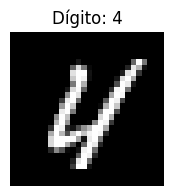

In [2]:
# ==============================================================================
# Fases 2 y 3: Comprensión y Preparación de Datos
# ==============================================================================

# Instalaciones y Módulos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical # Usaremos tensorflow, no una instalación separada
from google.colab import files
import os

# --- Parte A: Carga y Comprensión de Datos (Se ejecuta una sola vez) ---

# Verifica si el archivo ya existe en el entorno de Colab
file_name = "mnist_test.csv"
if not os.path.exists(file_name):
    print("Por favor, sube el archivo 'mnist_test.csv' cuando se te solicite.")
    # Sube el archivo si no existe
    uploaded = files.upload()
    # Asegúrate de que el archivo fue subido
    if file_name not in uploaded:
        print(f"Error: El archivo '{file_name}' no fue subido. Deteniendo la ejecución.")

print(f"Cargando el archivo {file_name}...")
df = pd.read_csv(file_name)

# Comprensión Inicial de los Datos
print("\n--- Comprensión de Datos ---")
print("Dimensiones del DataFrame:", df.shape)
print("\nPrimeras 5 filas:")
print(df.head())
print("\nDistribución de las Etiquetas (Target):")
print(df['label'].value_counts().sort_index())

# --- Parte B: Preparación de Datos ---

# Separar la etiqueta (y) de las características (X)
# La columna 'label' es la etiqueta (y). El resto son píxeles (X).
X = df.drop('label', axis=1).values # Características (píxeles)
y = df['label'].values             # Etiquetas (dígitos 0-9)

# 1. Normalización y Reshape de X
# El rango de píxeles es de 0 a 255. Normalizamos a 0-1.
X = X / 255.0

# El formato de MNIST es 28x28 píxeles. Reshapeamos para la CNN.
# El -1 asegura que se mantenga el número de muestras (filas).
# El 1 al final indica un canal (escala de grises).
X = X.reshape(-1, 28, 28, 1)

# 2. Codificación One-Hot de y
# Convertimos las etiquetas de un entero (ej: 5) a un vector (ej: [0,0,0,0,0,1,0,0,0,0])
num_classes = 10
y = to_categorical(y, num_classes=num_classes)

# 3. División en Conjunto de Entrenamiento y Prueba
# Usaremos el 80% para entrenamiento y el 20% para prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\n--- Preparación de Datos Completada ---")
print(f"Forma de X_train: {X_train.shape}")
print(f"Forma de y_train: {y_train.shape}")
print(f"Forma de X_test: {X_test.shape}")
print(f"Forma de y_test: {y_test.shape}")

# Opcional: Visualización de un dígito
plt.figure(figsize=(2,2))
plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
plt.title(f"Dígito: {np.argmax(y_train[0])}")
plt.axis('off')
plt.show()

In [3]:
# ==============================================================================
# Fase 4: Modelado - Red Neuronal Convolucional (CNN con TensorFlow/Keras)
# ==============================================================================

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

print("\n--- Fase 4: Construcción y Entrenamiento de la CNN ---")

# 1. Definición del Modelo CNN
# Arquitectura simple y efectiva para MNIST
model = Sequential([
    # Capa Convolucional 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    # Capa Convolucional 2
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Aplanamiento de las características 2D a 1D
    Flatten(),

    # Capa Densa (Fully Connected)
    Dense(128, activation='relu'),
    Dropout(0.5), # Regularización para evitar sobreajuste

    # Capa de Salida
    Dense(num_classes, activation='softmax') # 10 clases (dígitos 0-9)
])

# 2. Compilación del Modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy', # Adecuada para clasificación multi-clase One-Hot
              metrics=['accuracy'])

# Resumen de la arquitectura del modelo
model.summary()

# 3. Entrenamiento del Modelo
# Usamos un conjunto de validación para monitorear el sobreajuste
history = model.fit(
    X_train, y_train,
    epochs=15, # Número de iteraciones sobre todo el conjunto de datos
    batch_size=64,
    validation_data=(X_test, y_test),
    verbose=1
)

print("\nEntrenamiento de la CNN completado.")

# Evaluación final en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nPrecisión (Accuracy) en el conjunto de prueba: {accuracy*100:.2f}%")


--- Fase 4: Construcción y Entrenamiento de la CNN ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - accuracy: 0.5665 - loss: 1.3246 - val_accuracy: 0.9420 - val_loss: 0.1867
Epoch 2/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - accuracy: 0.9198 - loss: 0.2614 - val_accuracy: 0.9645 - val_loss: 0.1166
Epoch 3/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 0.9462 - loss: 0.1659 - val_accuracy: 0.9695 - val_loss: 0.0959
Epoch 4/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.9575 - loss: 0.1382 - val_accuracy: 0.9790 - val_loss: 0.0687
Epoch 5/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - accuracy: 0.9713 - loss: 0.0972 - val_accuracy: 0.9795 - val_loss: 0.0694
Epoch 6/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.9760 - loss: 0.0798 - val_accuracy: 0.9805 - val_loss: 0.0620
Epoch 7/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 0.9767 - loss: 0.0781 - val_accuracy: 0.9840 - val_loss: 0.0593
Epoch 8/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.9828 - loss: 0.0546 - val_ac


--- Fase 5: Evaluación y KPIs ---
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step

KPI Principal - Precisión Global: 98.85%

Matriz de Confusión:


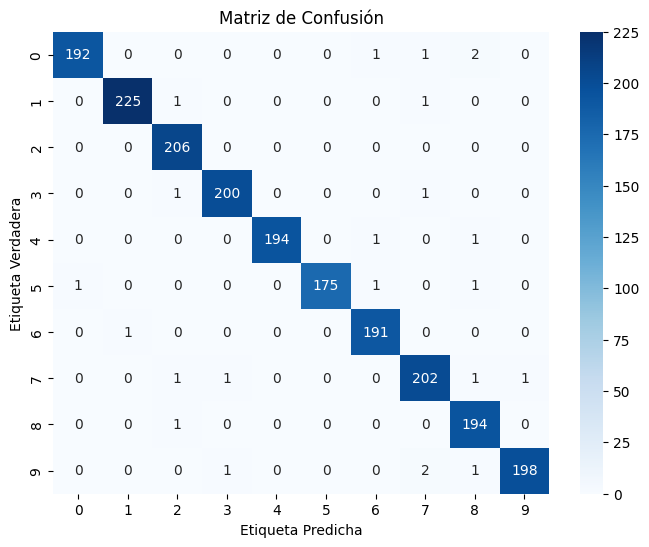


Reporte de Clasificación (Métricas por Clase):
              precision    recall  f1-score   support

           0     0.9948    0.9796    0.9871       196
           1     0.9956    0.9912    0.9934       227
           2     0.9810    1.0000    0.9904       206
           3     0.9901    0.9901    0.9901       202
           4     1.0000    0.9898    0.9949       196
           5     1.0000    0.9831    0.9915       178
           6     0.9845    0.9948    0.9896       192
           7     0.9758    0.9806    0.9782       206
           8     0.9700    0.9949    0.9823       195
           9     0.9950    0.9802    0.9875       202

    accuracy                         0.9885      2000
   macro avg     0.9887    0.9884    0.9885      2000
weighted avg     0.9886    0.9885    0.9885      2000



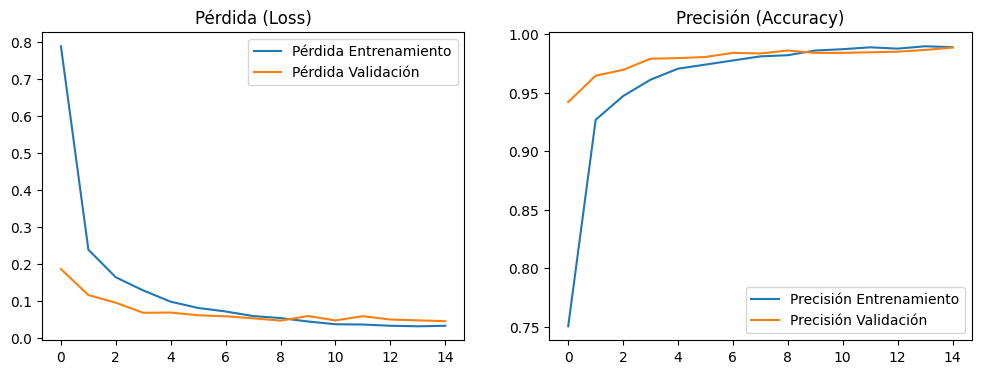

In [4]:
# ==============================================================================
# Fase 5: Evaluación - Matrices (KPIs)
# ==============================================================================

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

print("\n--- Fase 5: Evaluación y KPIs ---")

# 1. Predicciones
# Obtenemos las probabilidades de predicción para el conjunto de prueba
y_pred_probs = model.predict(X_test)
# Convertimos las probabilidades (one-hot) a etiquetas de clase (entero)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
# Convertimos las etiquetas reales (one-hot) a etiquetas de clase (entero)
y_true_classes = np.argmax(y_test, axis=1)

# 2. KPI: Precisión (Accuracy)
test_accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f"\nKPI Principal - Precisión Global: {test_accuracy*100:.2f}%")

# 3. KPI: Matriz de Confusión
cm = confusion_matrix(y_true_classes, y_pred_classes)
print("\nMatriz de Confusión:")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.title('Matriz de Confusión')
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.show()

# 4. KPI: Reporte de Clasificación (Precisión, Recall, F1-Score por clase)
print("\nReporte de Clasificación (Métricas por Clase):")
print(classification_report(y_true_classes, y_pred_classes, digits=4))

# Opcional: Gráfico de Pérdida (Loss) y Precisión (Accuracy) del entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida Validación')
plt.title('Pérdida (Loss)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión Validación')
plt.title('Precisión (Accuracy)')
plt.legend()
plt.show()

In [5]:
# =ON=============================================================================
# Fase 6: Despliegue (Guardar el Modelo)
# ==============================================================================

# Nombre del archivo para guardar el modelo
model_save_path = "cnn_mnist_model.h5"

print("\n--- Fase 6: Despliegue (Guardar el Modelo) ---")

# Guardar el modelo en formato HDF5
try:
    model.save(model_save_path)
    print(f"Modelo guardado exitosamente en: {model_save_path}")

    # Opcional: Descargar el archivo a tu máquina local
    # files.download(model_save_path)
    # print("Modelo listo para ser descargado.")

except Exception as e:
    print(f"Error al guardar el modelo: {e}")

# Ejemplo de cómo cargar el modelo posteriormente:
# from tensorflow.keras.models import load_model
# loaded_model = load_model(model_save_path)
# print("\nModelo cargado y listo para predicciones.")


--- Fase 6: Despliegue (Guardar el Modelo) ---
Modelo guardado exitosamente en: cnn_mnist_model.h5
